In [29]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [30]:
import numpy as np

np.random.seed(42)

# Generating synthetic 5 classed data with 2 input features
num_samples = 1000  # total samples
num_features = 3    # x1, x2, x3
num_classes = 5     # class labels 0-4

# Random input features
X = np.random.randn(num_samples, num_features)

# Random class labels (0 to 4)
Y = np.random.randint(0, num_classes, size=num_samples)

# # Example output
# print("First 5 samples of X:\n", X[:5])
# print("First 5 labels:", Y[:5])


df = pd.DataFrame(X, columns=['x1', 'x2', 'x3'])
df['class'] = Y

print(df.head())

         x1        x2        x3  class
0  0.496714 -0.138264  0.647689      3
1  1.523030 -0.234153 -0.234137      1
2  1.579213  0.767435 -0.469474      0
3  0.542560 -0.463418 -0.465730      1
4  0.241962 -1.913280 -1.724918      4


In [31]:
class NeuralNetwork(object):
  def __init__(self):
    inputLayerNeurons = 3
    hiddenLayer1Neurons = 10
    hiddenLayer2Neurons = 10
    hiddenLayer3Neurons = 10
    outputLayerNeurons = 5

    self.learning_rate = 0.002

    self.weight_hidden1_input = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
    self.weight_hidden2_hidden1 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
    self.weight_hidden3_hidden2 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
    self.weight_output_hidden3 = np.random.randn(hiddenLayer3Neurons, outputLayerNeurons)

  def sigmoid(self, x, der = False):
    if der == True:
      return x * (1 - x)
    return 1 / (1 + np.exp(-x))


  def feedForward(self, X):

    hidden1_input = np.dot(X, self.weight_hidden1_input)
    self.hidden1_output = self.sigmoid(hidden1_input)

    hidden2_input = np.dot(self.hidden1_output, self.weight_hidden2_hidden1)
    self.hidden2_output = self.sigmoid(hidden2_input)

    hidden3_input = np.dot(self.hidden2_output, self.weight_hidden3_hidden2)
    self.hidden3_output = self.sigmoid(hidden3_input)

    output_input = np.dot(self.hidden3_output, self.weight_output_hidden3)
    prediction = self.sigmoid(output_input)

    return prediction

  def backPropagation(self, X, Y, prediction):
    output_error = Y - prediction
    output_delta = output_error * self.sigmoid(prediction, der = True)

    hidden3_error = output_delta.dot(self.weight_output_hidden3.T)
    hidden3_delta = hidden3_error * self.sigmoid(self.hidden3_output, der = True)

    hidden2_error = hidden3_delta.dot(self.weight_hidden3_hidden2.T)
    hidden2_delta = hidden2_error * self.sigmoid(self.hidden2_output, der = True)

    hidden1_error = hidden2_delta.dot(self.weight_hidden2_hidden1.T)
    hidden1_delta = hidden1_error * self.sigmoid(self.hidden1_output, der = True)

    self.weight_output_hidden3 += self.hidden3_output.T.dot(output_delta) * self.learning_rate
    self.weight_hidden3_hidden2 += self.hidden2_output.T.dot(hidden3_delta) * self.learning_rate
    self.weight_hidden2_hidden1 += self.hidden1_output.T.dot(hidden2_delta) * self.learning_rate
    self.weight_hidden1_input += X.T.dot(hidden1_delta) * self.learning_rate

  def train(self, X, Y):
    output = self.feedForward(X)
    self.backPropagation(X, Y, output)



In [32]:
X = df[['x1','x2', 'x3']].values
Y = df['class'].values
enc = OneHotEncoder(sparse_output=False)
Y = enc.fit_transform(df[['class']])

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

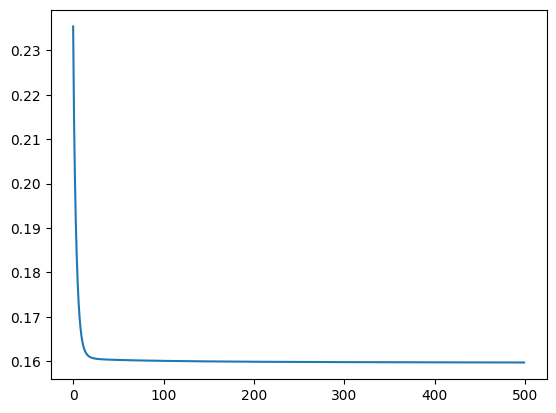

In [34]:
NN = NeuralNetwork()
error = []
for i in range(500):
  NN.train(X_train, Y_train)
  error.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(error)

In [35]:
test_pred = NN.feedForward(X_test)

In [36]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pred_classes = np.argmax(test_pred, axis=1)
true_classes = np.argmax(Y_test, axis=1)

print("Accuracy:", accuracy_score(true_classes, pred_classes))
print("\nClassification Report:\n")
print(classification_report(true_classes, pred_classes))


Accuracy: 0.21

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.16      0.28      0.21        40
           2       0.00      0.00      0.00        41
           3       0.24      0.55      0.33        42
           4       0.24      0.20      0.22        41

    accuracy                           0.21       200
   macro avg       0.13      0.20      0.15       200
weighted avg       0.13      0.21      0.16       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


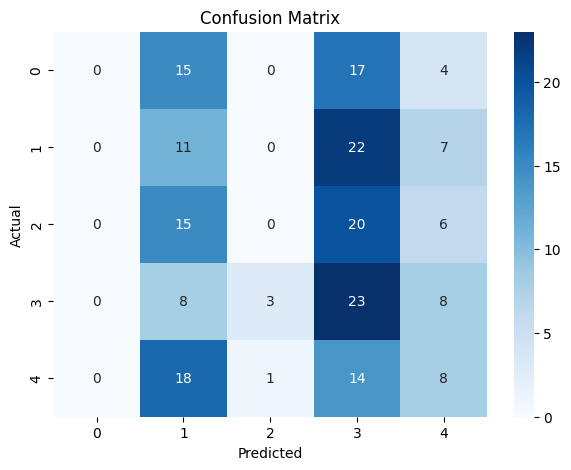

In [37]:
import seaborn as sns

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Results

The neural network achieved an overall accuracy of 0.21 on the testing set. Class-wise performance varied significantly, with precision, recall, and F1-scores remaining low for most classes. The best-performing classes were Class 1 and Class 3, which achieved slightly better recall values (0.28 and 0.55 respectively). Other classes, such as Class 0 and Class 2, showed almost no correct predictions. Overall, both macro and weighted averages indicate weak multi-class performance.

# Analysis

The low accuracy and uneven class-wise metrics suggest that the model struggled to learn meaningful decision boundaries from the synthetic dataset. Since the dataset is fully random with no real patterns, the network has difficulty identifying separable features for each class. Additionally, using sigmoid activation in the output layer for a multi-class classification problem can limit performance, because sigmoid treats each output independently rather than enforcing competition between classes (as softmax does). The small learning rate and limited training epochs may also contribute to underfitting.

# Discussion

The results show that the current neural network configuration has difficulty handling the synthetic 5-class problem. Performance could be improved by generating more structured synthetic data, increasing training epochs, tuning the learning rate, or using better activation functions such as ReLU for hidden layers and softmax for the output layer. Despite the low accuracy, the experiment demonstrates how multi-class neural networks behave when class boundaries are not well defined and highlights the importance of dataset quality, architecture choices, and training parameters.